In [2]:
#!/usr/bin/env python
%matplotlib inline
# Run logistic regression training for different learning rates with stochastic gradient descent.
import pandas as pd
import numpy as np
import scipy.special as sps
import warnings
import matplotlib.pyplot as plt
# warnings.filterwarnings('ignore')
#import assignment2 as a2

In [3]:
#execfile("logistic_regression_mod.py")
data=pd.read_csv("preprocessed_datasets.csv")
# Randomly permute the training data.
#data = np.random.permutation(data)

In [4]:
draft_year=data["DraftYear"]
GP_greater_than_0_ori=data["GP_greater_than_0"]
data.drop(["id", "PlayerName", "sum_7yr_TOI", "Overall","Country","sum_7yr_GP"], axis=1, inplace=True)

In [5]:
mask_no = GP_greater_than_0_ori == 'no'

In [6]:
GP_greater_than_0_ori[mask_no] = 0

C:\conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
mask_yes = GP_greater_than_0_ori == 'yes'

In [8]:
GP_greater_than_0_ori[mask_yes] = 1

C:\conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
GP_greater_than_0_ori = GP_greater_than_0_ori.astype(np.float64)

In [10]:
def standardize(df):
    res = df.copy()
    for i in res.columns:
        mean=np.mean(res[i])
        sd=np.std(res[i])
        if(sd == 0):
             res.drop(i, axis=1, inplace=True)
        else:
             res[i]=(res[i]-mean)/sd
    return res

In [11]:
def insert_1(df):
    res = df.copy()
    res['X'] = 1
    return res

In [12]:
train_set=data[data['DraftYear'].isin([2004,2005,2006])]
test_set=data[data['DraftYear'].isin([2007])]

In [13]:
GP_greater_than_0_train=train_set["GP_greater_than_0"].astype(np.float64)
GP_greater_than_0_test=test_set["GP_greater_than_0"].astype(np.float64)

In [14]:
train_set.drop(['DraftYear',"GP_greater_than_0"], axis=1, inplace=True)
test_set.drop(['DraftYear',"GP_greater_than_0"], axis=1, inplace=True)

C:\conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
train_set = pd.get_dummies(train_set, columns= ['country_group','Position'])
test_set = pd.get_dummies(test_set, columns= ['country_group','Position'])
#data.drop(['DraftYear',"GP_greater_than_0"], axis=1, inplace=True)

In [16]:
#train_set_interaction = interaction(train_set)
train_set_std = standardize(train_set)
test_set_std = standardize(test_set)

In [17]:
train_set_final = insert_1(train_set_std)
test_set_final = insert_1(test_set_std)

In [18]:
# Maximum number of iterations.  Continue until this limit, or when error change is below tol.
max_iter = 300
tol = 0.00001

In [19]:
# Target values, 0 for class 1, 1 for class 2.
#GP_greater_than_0_ori=data["GP_greater_than_0"]
t = len(data)

In [20]:
n_train=data['GP_greater_than_0'].size

In [21]:
# Error values over all iterations.
all_errors = dict()

In [22]:
m = len(GP_greater_than_0_train)

In [23]:
# Step size for gradient descent.
etas = [1.9, 1.0, 0.5, 0.3, 0.1, 0.05, 0.01]
#etas = [0.1, 0.05, 0.01]

In [24]:
all_errors = {}
accs = {}

In [25]:
for eta in etas:
        # Initialize w.
    w = np.array([0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).reshape((23,1))
    e_all = []
    for iter in range (0, max_iter):
        # Compute output using current w on sample x_n.
        #p =np.dot(train_set_final,w)
        y_train = sps.expit(np.dot(train_set_final,w)).transpose()

        # Gradient of the error, using Assignment result
        grad_e = np.dot((y_train - np.array(GP_greater_than_0_train).reshape(1, m)), train_set_final)
      
        # Update w, *subtracting* a step in the error derivative since we're minimizing
        # w = fill this in
        w = w - (1.0 * eta / m) * grad_e.reshape((23, 1))
        
        # Compute error over all examples, add this error to the end of error vector.
        # Compute output using current w on all data X.
        y_train = sps.expit(np.dot(train_set_final,w)).transpose()
        
        # e is the error, negative log-likelihood (Eqn 4.90)
        e = -np.mean(np.multiply(GP_greater_than_0_train.reshape(1,m), np.log(y_train)) 
                     + np.multiply((1-GP_greater_than_0_train.reshape(1,m)),np.log(1-y_train)))
        e_all.append(e)

        # Print some information.
        print ('eta={0}, epoch {1:d}, negative log-likelihood {2:.4f}, w={3}'.format(eta, iter, e, w.T))
        #Stop iterating if error doesn't change more than tol.
        if iter>0:
            if np.absolute(e-e_all[iter-1]) < tol:
                break
            
    all_errors[eta] = e_all
    y_test = sps.expit(np.dot(test_set_final,w)).transpose()
    preds = np.where( y_test > 0.5, 1, 0)
    accuracy = 1 - np.mean((preds - GP_greater_than_0_test.reshape(1,191))**2)
    accs[eta] = accuracy
    print(accs)

C:\conda\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\conda\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


eta=1.9, epoch 0, negative log-likelihood 0.6724, w=[[ 0.09617904 -0.0706461   0.05728151 -0.20920531  0.09660178  0.14434111
   0.186468    0.17844146 -0.00395833  0.0305027   0.09859695  0.09815201
   0.13940254  0.13099212  0.0843098   0.069549   -0.09991352  0.03004345
   0.02920588 -0.05704904  0.02166389  0.01590364 -0.10875436]]
eta=1.9, epoch 1, negative log-likelihood 0.6527, w=[[ 0.11019704 -0.03666228  0.17627787 -0.30183187 -0.00048824  0.00801898
   0.06938127  0.04500282 -0.07291635 -0.07398644 -0.03148545 -0.04710041
   0.01766995 -0.01089935 -0.00569225  0.0130997  -0.0906171   0.08521931
  -0.02786595  0.02798612  0.00390679 -0.00778604 -0.15512483]]
eta=1.9, epoch 2, negative log-likelihood 0.6562, w=[[ 0.15101954 -0.1371619   0.17385388 -0.37384593  0.08410274  0.12337189
   0.21362702  0.18479134 -0.06368604 -0.01995754  0.10052735  0.06971116
   0.17137317  0.13749879  0.11186905  0.09168995 -0.14883529  0.05857235
   0.01003923 -0.04722662  0.03814547  0.00795759 

  -0.01933206 -0.02927962  0.05025446  0.00582521 -0.2713161 ]]
eta=1.9, epoch 118, negative log-likelihood 0.6169, w=[[ 0.29254738 -0.37655735  0.46381815 -0.58027197  0.09622108 -0.0710182
   0.26099124  0.12638471 -0.26562161 -0.11195124 -0.02826544 -0.14669478
   0.20650431  0.05912331  0.22997195  0.09621777 -0.18882207  0.0976303
  -0.00878809 -0.0484624   0.05843161  0.00943948 -0.27105971]]
eta=1.9, epoch 119, negative log-likelihood 0.6168, w=[[ 0.28930792 -0.36109028  0.47765368 -0.58088923  0.07444474 -0.10285485
   0.22764316  0.0916909  -0.27485694 -0.13142789 -0.06308009 -0.18317728
   0.16937992  0.01946084  0.20286029  0.07865009 -0.17924564  0.10739583
  -0.01931342 -0.02931232  0.05026809  0.00583095 -0.27131811]]
eta=1.9, epoch 120, negative log-likelihood 0.6169, w=[[ 0.29253861 -0.376522    0.46383085 -0.58025797  0.09618925 -0.07108659
   0.26088673  0.12637264 -0.26563449 -0.11197748 -0.02831662 -0.14676259
   0.20642933  0.05904591  0.22992148  0.0961853  -0.188

eta=1.9, epoch 230, negative log-likelihood 0.6167, w=[[ 0.29236319 -0.37581307  0.4640811  -0.57999232  0.09548431 -0.07334039
   0.25775008  0.12796649 -0.26583488 -0.11253226 -0.02918868 -0.14810914
   0.2048587   0.05745886  0.22880783  0.09553225 -0.18840693  0.09796543
  -0.00915247 -0.04778521  0.05814328  0.00930278 -0.27110787]]
eta=1.9, epoch 231, negative log-likelihood 0.6166, w=[[ 0.28934929 -0.36143203  0.47695196 -0.58056953  0.07523255 -0.10295668
   0.22673728  0.09570081 -0.27442445 -0.13065255 -0.06157924 -0.18205197
   0.17032243  0.02055975  0.2035861   0.07919329 -0.17949983  0.10704742
  -0.01893827 -0.02997676  0.05054819  0.00594832 -0.27135615]]
eta=1.9, epoch 232, negative log-likelihood 0.6167, w=[[ 0.29236239 -0.37580981  0.46408228 -0.57999116  0.09548086 -0.0733693
   0.25771269  0.12801279 -0.26583568 -0.11253492 -0.02919239 -0.14811533
   0.20485123  0.05745141  0.22880243  0.09552921 -0.18840508  0.09796691
  -0.00915408 -0.04778223  0.05814202  0.0093

C:\conda\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


eta=1.0, epoch 32, negative log-likelihood 0.6157, w=[[ 0.27935355 -0.32869301  0.4226803  -0.56397521  0.0616989  -0.03886215
   0.20901835  0.10648555 -0.22524023 -0.12241201  0.01453066 -0.14109423
   0.1543227   0.02964795  0.16278316  0.08706198 -0.18022449  0.09872329
  -0.01546474 -0.02949692  0.04900177  0.00308228 -0.26657788]]
eta=1.0, epoch 33, negative log-likelihood 0.6156, w=[[ 0.2802623  -0.3311897   0.42540534 -0.56523389  0.06248073 -0.04066383
   0.21049471  0.1065373  -0.22721828 -0.12268391  0.01328192 -0.14267898
   0.15553315  0.02965968  0.16467507  0.08715296 -0.18053019  0.0989565
  -0.01542667 -0.02988262  0.04927618  0.00323478 -0.26694026]]
eta=1.0, epoch 34, negative log-likelihood 0.6156, w=[[ 0.28108781 -0.33351588  0.42795973 -0.56637772  0.06323646 -0.04239646
   0.21191135  0.10658603 -0.2290933  -0.12292186  0.01203468 -0.1441612
   0.15669153  0.02968677  0.16648827  0.08722893 -0.18080621  0.09917424
  -0.01538863 -0.03025224  0.04953479  0.00338372

eta=0.3, epoch 18, negative log-likelihood 0.6293, w=[[ 0.14255605 -0.1033419   0.18269888 -0.33396531  0.04115519  0.05026201
   0.13012128  0.10092128 -0.07734474 -0.05254314  0.0319702  -0.01611097
   0.08205993  0.04297878  0.05589037  0.05163783 -0.11586063  0.06849041
  -0.00769436 -0.01277747  0.02188483  0.00176215 -0.18010343]]
eta=0.3, epoch 19, negative log-likelihood 0.6285, w=[[ 0.14610917 -0.1083002   0.18937999 -0.34290712  0.04101546  0.04896063
   0.1319534   0.10140389 -0.08103364 -0.055247    0.03207112 -0.01882685
   0.0836208   0.04268332  0.05776388  0.0528746  -0.11850433  0.06998535
  -0.00831408 -0.01274174  0.02268407  0.00157941 -0.18452359]]
eta=0.3, epoch 20, negative log-likelihood 0.6278, w=[[ 0.14964231 -0.11322512  0.19582897 -0.35141559  0.04088772  0.04763659
   0.1337068   0.10182917 -0.08462924 -0.05784212  0.03217993 -0.02149761
   0.0851526   0.04239085  0.05963935  0.05407913 -0.12101493  0.07137021
  -0.00888814 -0.01274236  0.02346374  0.001411

eta=0.1, epoch 22, negative log-likelihood 0.6449, w=[[ 0.10678096 -0.04791564  0.08440815 -0.1853368   0.0400236   0.05735597
   0.09611721  0.08400365 -0.02857962 -0.01326563  0.03206002  0.01669996
   0.06072416  0.04502518  0.03606979  0.03455599 -0.07057217  0.03811942
   0.00307655 -0.01640657  0.01193018  0.00459457 -0.10090859]]
eta=0.1, epoch 23, negative log-likelihood 0.6441, w=[[ 0.10756085 -0.04949572  0.08789915 -0.19118816  0.04030064  0.05759974
   0.09773839  0.08508207 -0.03014004 -0.01456241  0.03210174  0.0158114
   0.06156872  0.04513366  0.03665456  0.03519366 -0.07243145  0.03944005
   0.00271308 -0.01628413  0.01224093  0.00452514 -0.10412709]]
eta=0.1, epoch 24, negative log-likelihood 0.6434, w=[[ 0.10836958 -0.05107653  0.09134766 -0.19691104  0.04054207  0.05778431
   0.09928558  0.0860888  -0.03169685 -0.01585873  0.03212765  0.01490013
   0.06238015  0.0452113   0.03723065  0.03581324 -0.07423993  0.04072538
   0.00234659 -0.0161533   0.01254946  0.0044509

eta=0.1, epoch 134, negative log-likelihood 0.6193, w=[[  2.16564818e-01  -2.11099031e-01   3.03367769e-01  -4.73805121e-01
    4.28965101e-02   1.63992532e-02   1.63555013e-01   1.05031523e-01
   -1.48290191e-01  -9.64361861e-02   3.28667390e-02  -7.34305798e-02
    1.13850998e-01   3.60355515e-02   9.99203803e-02   7.37834317e-02
   -1.56253093e-01   8.75624640e-02  -1.47446016e-02  -1.73891503e-02
    3.64720571e-02   2.22519360e-04  -2.39717784e-01]]
eta=0.1, epoch 135, negative log-likelihood 0.6193, w=[[  2.17251144e-01  -2.12180152e-01   3.04457756e-01  -4.74864239e-01
    4.29743863e-02   1.60058784e-02   1.63885048e-01   1.05044850e-01
   -1.48958514e-01  -9.67674184e-02   3.28366118e-02  -7.40144625e-02
    1.14168821e-01   3.59611285e-02   1.00400856e-01   7.39620691e-02
   -1.56548188e-01   8.76822546e-02  -1.47739896e-02  -1.74702278e-02
    3.65967359e-02   2.26748986e-04  -2.40083541e-01]]
eta=0.1, epoch 136, negative log-likelihood 0.6192, w=[[  2.17931208e-01  -2.13253

eta=0.1, epoch 248, negative log-likelihood 0.6162, w=[[ 0.26457036 -0.29589336  0.38848456 -0.54349928  0.05401205 -0.02001901
   0.19354601  0.10597675 -0.20208945 -0.11715367  0.02414988 -0.12131748
   0.1412071   0.03072444  0.14226527  0.08468556 -0.17502283  0.09571574
  -0.01566843 -0.02536148  0.04557568  0.00172127 -0.2609676 ]]
eta=0.1, epoch 249, negative log-likelihood 0.6162, w=[[ 0.26480065 -0.29637271  0.38897666 -0.5438198   0.05410986 -0.02027203
   0.19375405  0.10598356 -0.20241497 -0.11724042  0.02404134 -0.12160286
   0.14138643  0.0307028   0.14254512  0.08472702 -0.1751054   0.09575914
  -0.0156671  -0.02541741  0.04562536  0.0017378  -0.26105564]]
eta=0.1, epoch 250, negative log-likelihood 0.6162, w=[[ 0.26502874 -0.29684866  0.38946554 -0.54413721  0.05420748 -0.02052406
   0.19396127  0.10599036 -0.20273863 -0.11732618  0.02393248 -0.12188641
   0.14156495  0.03068151  0.1428237   0.08476793 -0.17518712  0.09580225
  -0.01566571 -0.02547311  0.0456747   0.001

eta=0.05, epoch 110, negative log-likelihood 0.6299, w=[[ 0.14068628 -0.1006832   0.17712733 -0.3251543   0.04122261  0.0505505
   0.12829685  0.09997113 -0.07469482 -0.05019338  0.03209302 -0.01447197
   0.08096976  0.04306601  0.05505557  0.05071427 -0.11318961  0.06660188
  -0.00694559 -0.01317805  0.02136123  0.00196871 -0.17525648]]
eta=0.05, epoch 111, negative log-likelihood 0.6298, w=[[ 0.14126294 -0.10150023  0.17827973 -0.3267267   0.04120437  0.0503478
   0.1286253   0.10007193 -0.07531949 -0.05065863  0.03210419 -0.01492812
   0.08123335  0.04301727  0.05536142  0.05092314 -0.11365631  0.06687676
  -0.00705632 -0.01316395  0.02149428  0.00193658 -0.17604419]]
eta=0.05, epoch 112, negative log-likelihood 0.6297, w=[[ 0.14183956 -0.10231661  0.17942527 -0.32828595  0.04118618  0.05014402
   0.12895102  0.1001706  -0.07594157 -0.05112081  0.03211567 -0.01538305
   0.08149607  0.04296855  0.05566747  0.0511311  -0.11411893  0.06714817
  -0.00716576 -0.01315091  0.02162686  0.00

eta=0.05, epoch 225, negative log-likelihood 0.6209, w=[[  1.99564826e-01  -1.85123961e-01   2.76720124e-01  -4.46468530e-01
    4.14845697e-02   2.54367968e-02   1.55778805e-01   1.04612435e-01
   -1.32103430e-01  -8.78203587e-02   3.32175776e-02  -5.95670828e-02
    1.06288971e-01   3.77929299e-02   8.87026712e-02   6.91785396e-02
   -1.48546487e-01   8.43640279e-02  -1.38155010e-02  -1.56356669e-02
    3.33528233e-02   2.42447305e-04  -2.29688157e-01]]
eta=0.05, epoch 226, negative log-likelihood 0.6209, w=[[  1.99982040e-01  -1.85750012e-01   2.77372365e-01  -4.47161495e-01
    4.15107190e-02   2.52255800e-02   1.55964748e-01   1.04624695e-01
   -1.32496888e-01  -8.80398030e-02   3.32149908e-02  -5.98993452e-02
    1.06470544e-01   3.77510182e-02   8.89680203e-02   6.92946843e-02
   -1.48743323e-01   8.44474244e-02  -1.38420086e-02  -1.56743665e-02
    3.34303174e-02   2.39722338e-04  -2.29952915e-01]]
eta=0.05, epoch 227, negative log-likelihood 0.6208, w=[[  2.00397503e-01  -1.86

eta=0.01, epoch 39, negative log-likelihood 0.6730, w=[[ 0.09950385 -0.01254631  0.01335071 -0.04121041  0.01610186  0.02388185
   0.03213566  0.03028727 -0.00227603  0.00340633  0.01554044  0.01455006
   0.02298449  0.02084344  0.01375947  0.01178653 -0.01849529  0.00682332
   0.00424833 -0.00893069  0.00368256  0.0025484  -0.02181242]]
eta=0.01, epoch 40, negative log-likelihood 0.6727, w=[[ 0.09950059 -0.01281056  0.01371001 -0.04217247  0.01641111  0.02433615
   0.03278244  0.03088452 -0.00236388  0.00342682  0.01581724  0.01478306
   0.02342238  0.02122012  0.01401831  0.01201931 -0.01890034  0.00700215
   0.00431346 -0.00908735  0.00375604  0.00259436 -0.02232993]]
eta=0.01, epoch 41, negative log-likelihood 0.6724, w=[[ 0.09949782 -0.01307292  0.0140702  -0.04313151  0.01671661  0.02478475
   0.03342295  0.03147536 -0.00245293  0.0034448   0.01608971  0.01501102
   0.02385494  0.0215912   0.01427388  0.01224964 -0.01930301  0.00718118
   0.00437698 -0.0092414   0.00382882  0.002

   0.00532737 -0.01635073  0.0093159   0.00472794 -0.07270551]]
eta=0.01, epoch 153, negative log-likelihood 0.6521, w=[[ 0.10223696 -0.03554189  0.05639048 -0.13488335  0.03550692  0.05165419
   0.07921746  0.07128404 -0.01690278 -0.0040179   0.03014396  0.02134945
   0.05174848  0.04165786  0.03056363  0.0284163  -0.05378601  0.02664006
   0.00530454 -0.01636264  0.00935251  0.00473022 -0.07309478]]
eta=0.01, epoch 154, negative log-likelihood 0.6519, w=[[ 0.10228694 -0.03571008  0.05676559 -0.13558681  0.0355876   0.05176175
   0.07947733  0.07148892 -0.01705304 -0.004131    0.03018613  0.02130802
   0.05188979  0.04172554  0.03064794  0.02850884 -0.05402649  0.02679919
   0.00528143 -0.01637407  0.00938901  0.00473232 -0.07348311]]
eta=0.01, epoch 155, negative log-likelihood 0.6518, w=[[ 0.10233732 -0.03587802  0.05714042 -0.13628854  0.03566735  0.05186786
   0.07973552  0.07169214 -0.01720347 -0.00424447  0.03022753  0.02126567
   0.05203005  0.04179216  0.03073171  0.02860085 -

eta=0.01, epoch 265, negative log-likelihood 0.6425, w=[[ 0.11000558 -0.05363418  0.09623477 -0.20429736  0.04050738  0.057346
   0.10081888  0.08679618 -0.03411444 -0.0178642   0.03201958  0.01315205
   0.06326074  0.04494491  0.03807842  0.03658362 -0.07645819  0.04228987
   0.00175214 -0.0158871   0.01302827  0.00428593 -0.11129618]]
eta=0.01, epoch 266, negative log-likelihood 0.6424, w=[[ 0.11009159 -0.05379371  0.09656825 -0.20484234  0.04052748  0.05735692
   0.10096302  0.08688704 -0.03426766 -0.01799081  0.03202228  0.01306039
   0.06333887  0.04495057  0.03813672  0.03664351 -0.07662953  0.04241027
   0.00171666 -0.01587481  0.01305899  0.00427833 -0.11159408]]
eta=0.01, epoch 267, negative log-likelihood 0.6424, w=[[ 0.11017785 -0.05395327  0.09690132 -0.20538616  0.0405473   0.05736737
   0.10110656  0.08697732 -0.03442082 -0.01811738  0.03202487  0.01296856
   0.06341675  0.04495601  0.03819497  0.03670325 -0.07680043  0.04253035
   0.00168118 -0.01586248  0.01308969  0.00

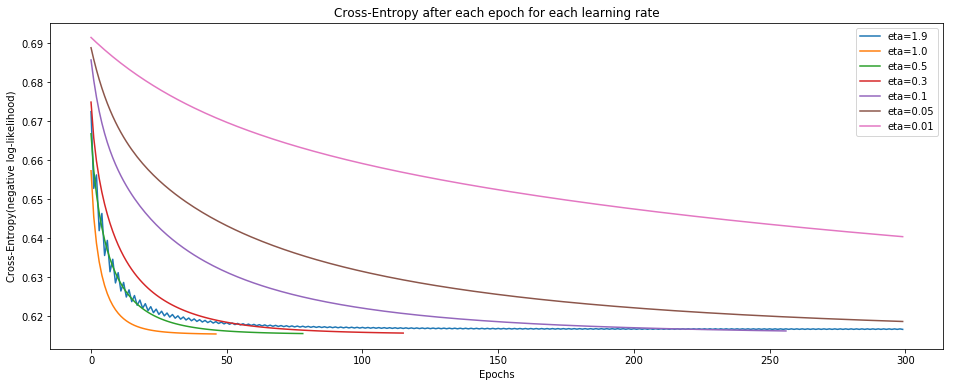

In [26]:
plt.figure(figsize=(16,6))
for eta in list(all_errors.keys()):
    plt.plot(all_errors[eta], label='eta={}'.format(eta))
plt.legend()
plt.ylabel('Cross-Entropy(negative log-likelihood)')
plt.title('Cross-Entropy after each epoch for each learning rate')
plt.xlabel('Epochs')
plt.savefig('Picture.png')